In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('IRIS.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
99,5.7,2.8,4.1,1.3,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
dataset['species']=dataset['species'].str.replace('Iris-','')

In [10]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'Length/Width')

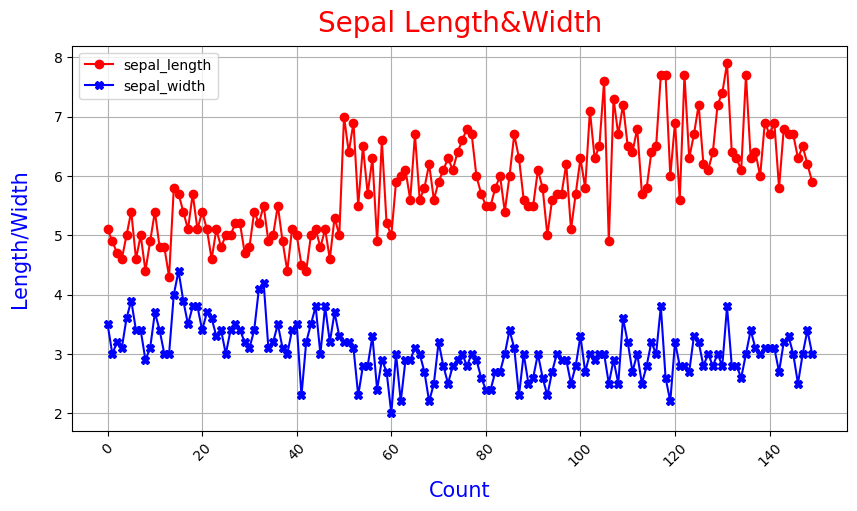

In [11]:

dataset['sepal_length'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)
dataset['sepal_width'].plot(kind='line',legend=True,marker="X",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

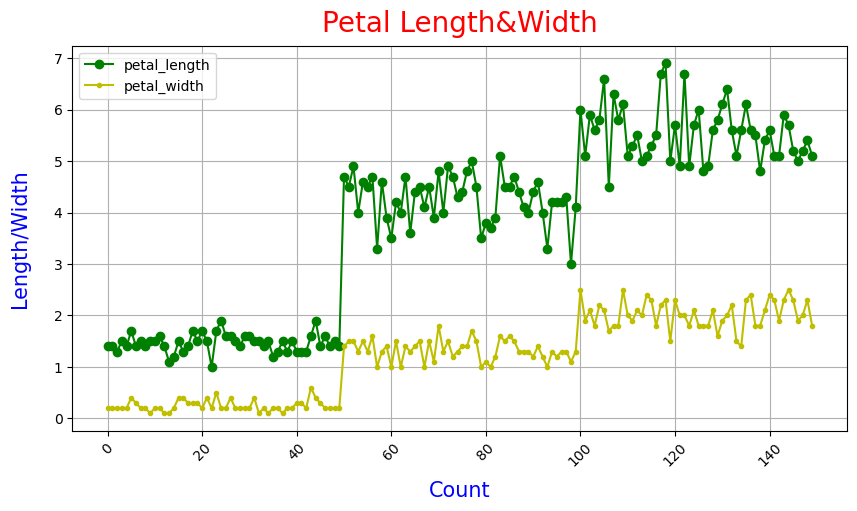

In [12]:
dataset['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
dataset['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

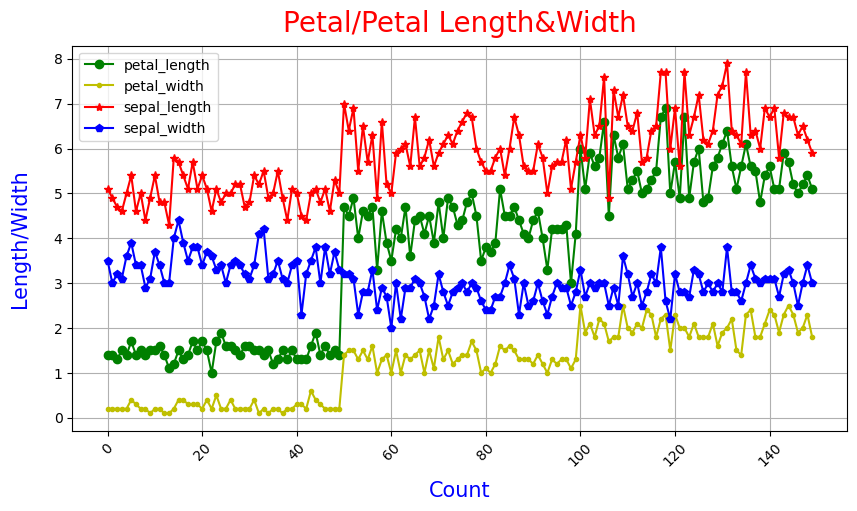

In [13]:
dataset['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
dataset['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
dataset['sepal_length'].plot(kind='line',legend=True,marker="*",color='r',figsize=(10,5),grid=True,rot=45)
dataset['sepal_width'].plot(kind='line',legend=True,marker="p",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

<Figure size 1700x600 with 0 Axes>

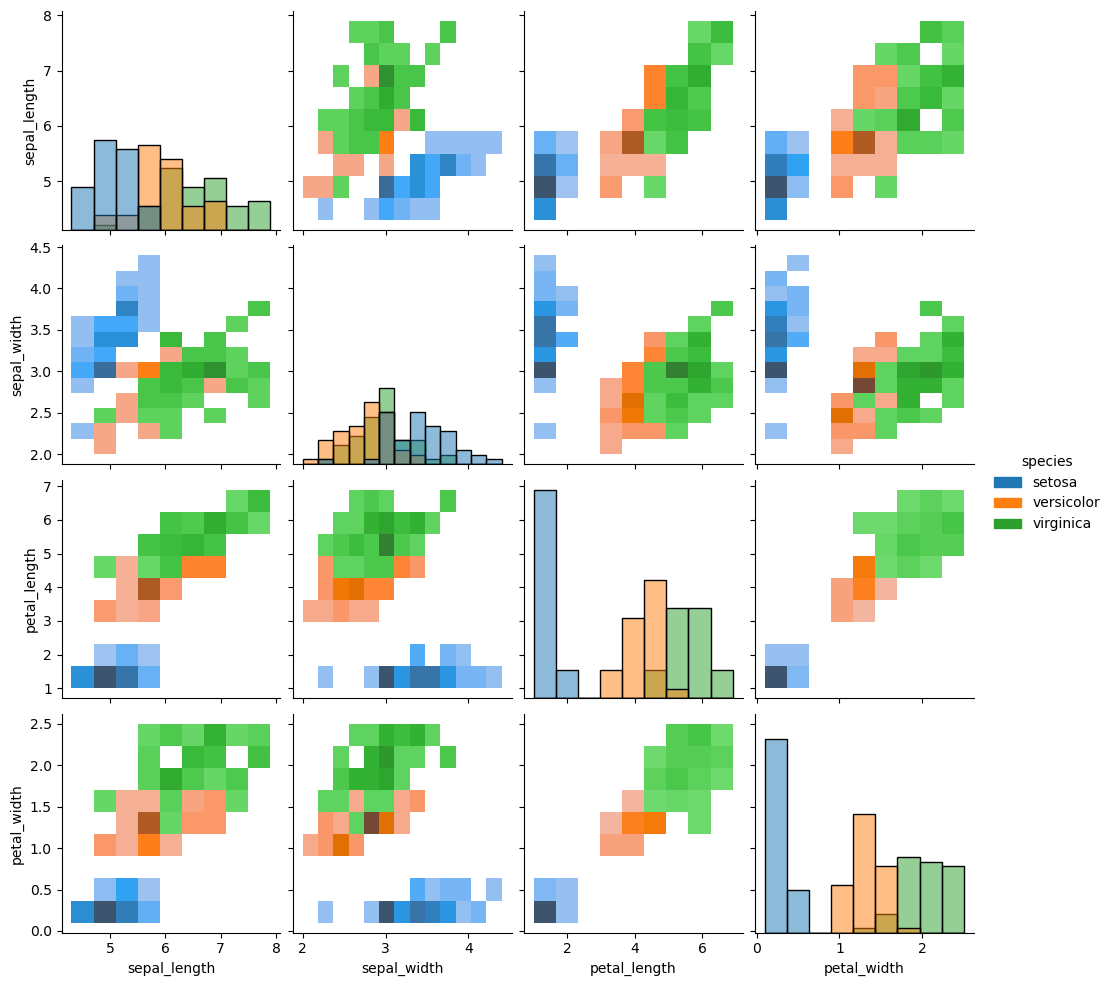

In [14]:
plt.figure(figsize=(17,6))
sns.pairplot(dataset,hue='species',kind='hist')

<AxesSubplot:title={'center':'Species'}>

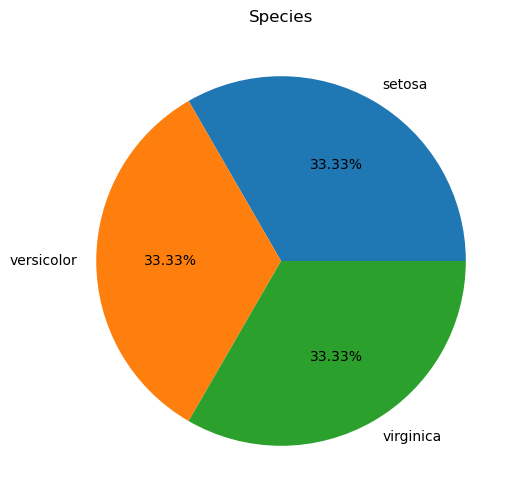

In [15]:
plt.figure(figsize=(17,6))
dataset['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

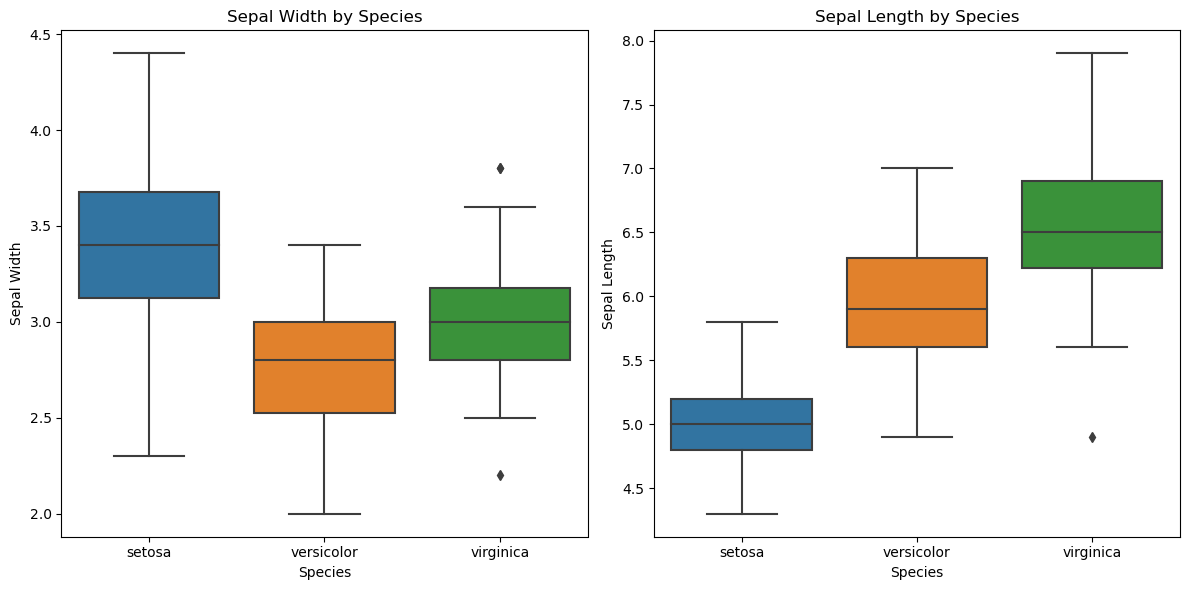

In [17]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=dataset, x='species', y='sepal_width', ax=axes[0])
axes[0].set_title('Sepal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Width')
sns.boxplot(data=dataset, x='species', y='sepal_length', ax=axes[1])
axes[1].set_title('Sepal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Length')
plt.tight_layout()
plt.show()

In [18]:
X_train,X_test,y_train,y_test = train_test_split(dataset.iloc[:,:4],dataset['species'],test_size=0.2,random_state=2)

In [19]:
lor = LogisticRegression()

In [20]:
lor.fit(X_train,y_train)

LogisticRegression()

In [21]:
test = lor.predict(X_test)
for tests in test:
    print("->",tests)

-> setosa
-> setosa
-> virginica
-> setosa
-> setosa
-> virginica
-> setosa
-> virginica
-> virginica
-> setosa
-> setosa
-> setosa
-> setosa
-> setosa
-> versicolor
-> versicolor
-> setosa
-> versicolor
-> virginica
-> versicolor
-> virginica
-> versicolor
-> virginica
-> versicolor
-> versicolor
-> setosa
-> setosa
-> virginica
-> setosa
-> virginica


In [22]:
lor.score(X_test,y_test)

0.9666666666666667

In [23]:
y_test.values

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica'], dtype=object)

In [24]:
minmax = MinMaxScaler()

In [25]:
x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [26]:
lor.fit(x_train,y_train)

LogisticRegression()

In [27]:
test1= lor.predict(x_test)
for test2 in test1:
    print("->",test2)

-> setosa
-> setosa
-> virginica
-> setosa
-> setosa
-> virginica
-> setosa
-> virginica
-> virginica
-> setosa
-> setosa
-> setosa
-> setosa
-> setosa
-> virginica
-> virginica
-> setosa
-> versicolor
-> virginica
-> versicolor
-> virginica
-> versicolor
-> virginica
-> versicolor
-> versicolor
-> setosa
-> setosa
-> virginica
-> setosa
-> virginica


In [28]:
lor.score(x_test,y_test)

0.9